In [60]:
import numpy as np
import pandas as pd
import keras
from keras import layers
from matplotlib import pyplot as plt

In [108]:
df_th = pd.read_csv('../time_series.csv')
df_th.head()
df_th.drop(columns=["Unnamed: 0"], inplace=True)
df_th

,T,H,Time
0,26.0,39.0,2
1,26.0,39.0,3
2,26.0,39.0,4
3,26.0,39.0,5
4,26.0,39.0,6
...,...,...,...
4995,26.0,38.0,5149
4996,26.0,38.0,5150
4997,26.0,38.0,5151
4998,26.0,38.0,5152


In [430]:
df_tha = pd.read_csv('../anom_time_series_try2.csv')
#df_tha = pd.read_csv('../anom_time_series.csv')
df_tha.head()
df_tha.drop(columns=["Unnamed: 0"], inplace=True)
df_tha

,T,H,Time
0,26.0,37.0,2
1,26.0,37.0,3
2,26.0,37.0,4
3,26.0,37.0,5
4,26.0,37.0,6
...,...,...,...
495,25.0,39.0,512
496,25.0,39.0,513
497,25.0,39.0,514
498,25.0,39.0,515


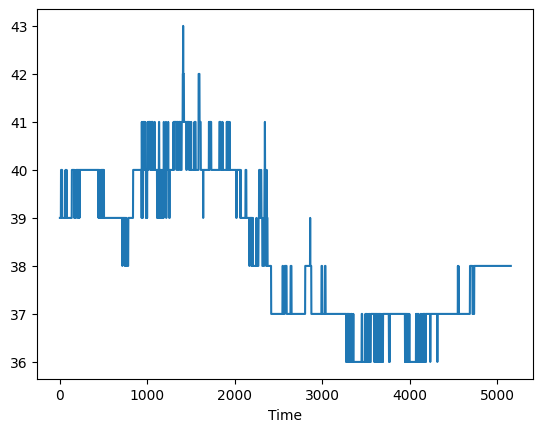

In [431]:
fig, ax = plt.subplots()
df_th.plot(legend=False, ax=ax, x = "Time", y = "H")
plt.show()

In [432]:
t_mean_train = df_th["T"].mean()
t_std_train = df_th["T"].std()
df_th["T_standardscaled"] = (df_th["T"] - t_mean_train) / t_std_train #standard scaling the training set

h_mean_train = df_th["H"].mean()
h_std_train = df_th["H"].std()
df_th["H_standardscaled"] = (df_th["H"] - h_mean_train) / h_std_train #standard scaling the training set

df_th

,T,H,Time,T_standardscaled,H_standardscaled
0,26.0,39.0,2,-0.654444,0.469262
1,26.0,39.0,3,-0.654444,0.469262
2,26.0,39.0,4,-0.654444,0.469262
3,26.0,39.0,5,-0.654444,0.469262
4,26.0,39.0,6,-0.654444,0.469262
...,...,...,...,...,...
4995,26.0,38.0,5149,-0.654444,-0.193912
4996,26.0,38.0,5150,-0.654444,-0.193912
4997,26.0,38.0,5151,-0.654444,-0.193912
4998,26.0,38.0,5152,-0.654444,-0.193912


In [433]:
# t_mean_train = df_tha["T"].mean()
# t_std_train = df_tha["T"].std()
df_tha["T_standardscaled"] = (df_tha["T"] - t_mean_train) / t_std_train #standard scaling the training set

# h_mean = df_tha["H"].mean()
# h_std = df_tha["H"].std()
df_tha["H_standardscaled"] = (df_tha["H"] - h_mean_train) / h_std_train #standard scaling the training set

df_tha

,T,H,Time,T_standardscaled,H_standardscaled
0,26.0,37.0,2,-0.654444,-0.857087
1,26.0,37.0,3,-0.654444,-0.857087
2,26.0,37.0,4,-0.654444,-0.857087
3,26.0,37.0,5,-0.654444,-0.857087
4,26.0,37.0,6,-0.654444,-0.857087
...,...,...,...,...,...
495,25.0,39.0,512,-2.249094,0.469262
496,25.0,39.0,513,-2.249094,0.469262
497,25.0,39.0,514,-2.249094,0.469262
498,25.0,39.0,515,-2.249094,0.469262


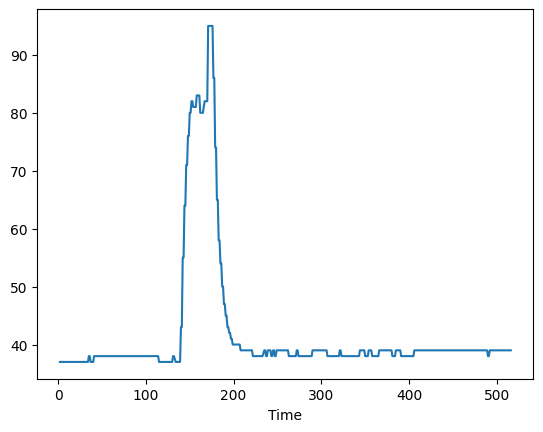

In [434]:
fig, ax = plt.subplots()
df_tha.plot(legend=False, ax=ax, x = "Time", y = "H")
plt.show()

In [435]:
print("Number of training samples:", len(df_th))

Number of training samples: 5000


In [436]:
df_th

,T,H,Time,T_standardscaled,H_standardscaled
0,26.0,39.0,2,-0.654444,0.469262
1,26.0,39.0,3,-0.654444,0.469262
2,26.0,39.0,4,-0.654444,0.469262
3,26.0,39.0,5,-0.654444,0.469262
4,26.0,39.0,6,-0.654444,0.469262
...,...,...,...,...,...
4995,26.0,38.0,5149,-0.654444,-0.193912
4996,26.0,38.0,5150,-0.654444,-0.193912
4997,26.0,38.0,5151,-0.654444,-0.193912
4998,26.0,38.0,5152,-0.654444,-0.193912


In [437]:
#running model only on humidity
df_train = df_th[["H_standardscaled"]]

In [438]:
df_train    

,H_standardscaled
0,0.469262
1,0.469262
2,0.469262
3,0.469262
4,0.469262
...,...
4995,-0.193912
4996,-0.193912
4997,-0.193912
4998,-0.193912


In [439]:
df_test = df_tha[["H_standardscaled"]]
df_test

,H_standardscaled
0,-0.857087
1,-0.857087
2,-0.857087
3,-0.857087
4,-0.857087
...,...
495,0.469262
496,0.469262
497,0.469262
498,0.469262


In [639]:
TIME_STEPS = 60
# Generated training sequences for use in the model.
def create_sequences(values, time_steps=TIME_STEPS):
    output = []
    for i in range(len(values) - time_steps + 1):
        output.append(values[i : (i + time_steps)])
    return np.stack(output)


x_train = create_sequences(df_train.values)
print("Training input shape: ", x_train.shape)

Training input shape:  (4941, 60, 1)


In [640]:
x_train

array([[[ 0.46926245],
        [ 0.46926245],
        [ 0.46926245],
        ...,
        [ 0.46926245],
        [ 0.46926245],
        [ 0.46926245]],

       [[ 0.46926245],
        [ 0.46926245],
        [ 0.46926245],
        ...,
        [ 0.46926245],
        [ 0.46926245],
        [ 0.46926245]],

       [[ 0.46926245],
        [ 0.46926245],
        [ 0.46926245],
        ...,
        [ 0.46926245],
        [ 0.46926245],
        [ 0.46926245]],

       ...,

       [[-0.19391229],
        [-0.19391229],
        [-0.19391229],
        ...,
        [-0.19391229],
        [-0.19391229],
        [-0.19391229]],

       [[-0.19391229],
        [-0.19391229],
        [-0.19391229],
        ...,
        [-0.19391229],
        [-0.19391229],
        [-0.19391229]],

       [[-0.19391229],
        [-0.19391229],
        [-0.19391229],
        ...,
        [-0.19391229],
        [-0.19391229],
        [-0.19391229]]])

In [641]:
model = keras.Sequential(
    [
        layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
        layers.Conv1D(
            filters=32,
            kernel_size=5,
            padding="same",
            strides=2,
            activation="relu",
        ),
        layers.Dropout(rate=0.2),
        layers.Conv1D(
            filters=16,
            kernel_size=5,
            padding="same",
            strides=1,
            activation="relu",
        ),
        layers.Conv1DTranspose(
            filters=16,
            kernel_size=5,
            padding="same",
            strides=2,
            activation="relu",
        ),
        layers.Dropout(rate=0.1),
        layers.Conv1DTranspose(
            filters=32,
            kernel_size=5,
            padding="same",
            strides=1,
            activation="relu",
        ),
        layers.Conv1DTranspose(filters=1, kernel_size=4, padding="same")
    ]
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
model.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_112 (Conv1D)             │ (None, 30, 32)         │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_112 (Dropout)           │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_113 (Conv1D)             │ (None, 30, 16)         │         2,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_168            │ (None, 60, 16)         │         1,296 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_113 (Dropout)           │ (None, 60, 16)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_169            │ (None, 60, 32)         │         2,592 │
│ (Conv1DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_transpose_170            │ (None, 60, 1)          │           129 │
│ (Conv1DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,785 (26.50 KB)

 Trainable params: 6,785 (26.50 KB)

 Non-trainable params: 0 (0.00 B)

In [642]:
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=250,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.9029 - val_loss: 0.0365
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1370 - val_loss: 0.0151
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0861 - val_loss: 0.0161
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0682 - val_loss: 0.0164
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0603 - val_loss: 0.0142
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0514 - val_loss: 0.0123
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0435 - val_loss: 0.0089
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0384 - val_loss: 0.0058
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0354 - val_loss: 0.0046
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0332 - val_loss: 0.0041
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0305 - val_loss: 0.0037
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0287 - val_

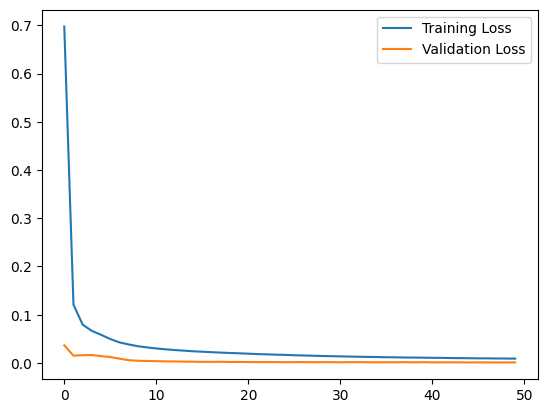

In [643]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

155/155 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


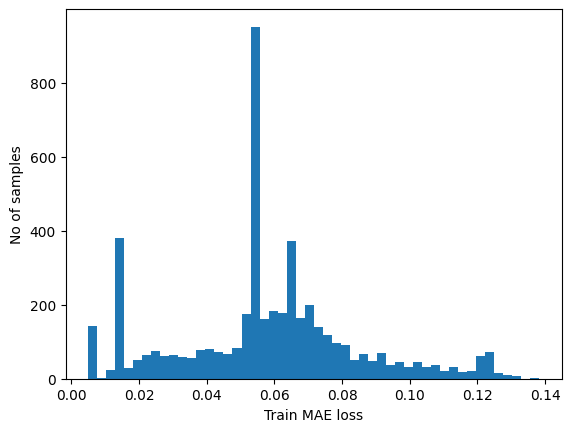

Reconstruction error threshold:  0.1382093646375852


In [644]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

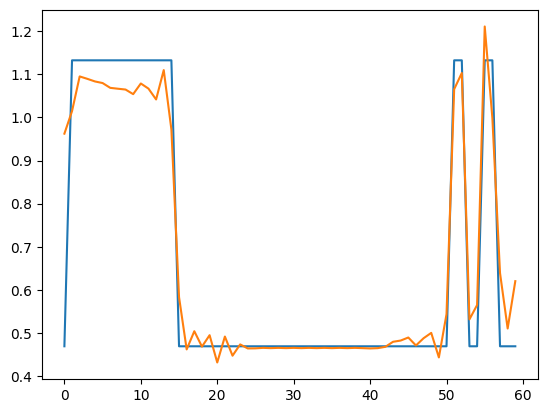

In [645]:
plt.plot(x_train[11])
plt.plot(x_train_pred[11])
plt.show()

In [646]:
x_test = create_sequences(df_test.values)
print("Test input shape: ", x_test.shape)

Test input shape:  (441, 60, 1)


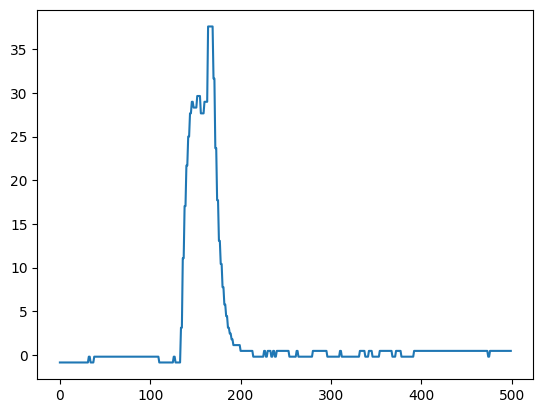

Test input shape:  (441, 60, 1)
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


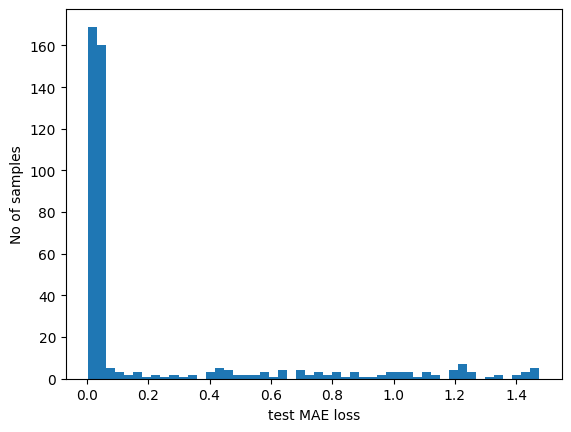

Number of anomaly samples:  102
Indices of anomaly samples:  (array([ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179], dtype=int64),)


In [647]:
fig, ax = plt.subplots()
df_test.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

In [648]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test) - TIME_STEPS + 1):
#for data_idx in range(0, len(df_test) - 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)

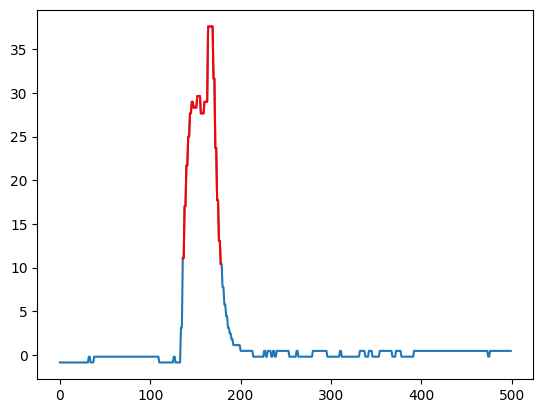

In [649]:
df_subset = df_test.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_test.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

In [650]:
anomaly_loc = np.where(anomalies)
anomaly_loc

(array([ 77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
        116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
        129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
        142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
        155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
        168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 179], dtype=int64),)

In [651]:
df_subset = df_test.iloc[anomaly_loc]

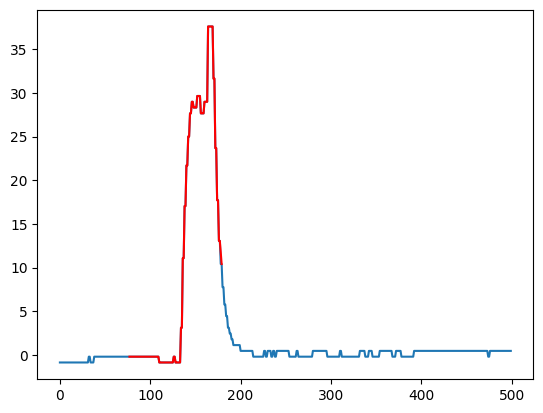

In [652]:
fig, ax = plt.subplots()
df_test.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()